Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [9]:
import os
import numpy as np
import pandas as pd


In [16]:
os.chdir("C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/")


In [20]:
os.chdir("C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/Final_Project_Statistical_Modelling/notebooks")


In [17]:
complete_montreal_df = pd.read_csv("complete_montreal_df.csv")

In [18]:
complete_montreal_df

,station_id,num_bikes_available,name,lat,lon
0,1,4,Métro Champ-de-Mars (Viger / Sanguinet),45.510253,-73.556777
1,3,3,Clark / Ontario,45.510599,-73.566925
2,11,2,de la Porte de Québec / St-André,45.513294,-73.550578
3,15,4,St-Denis / de Maisonneuve,45.514339,-73.561685
4,19,9,Métro Sherbrooke (de Rigaud / Berri),45.518143,-73.568004
...,...,...,...,...,...
156,848,11,Préfontaine / Marcel-Pépin,45.543654,-73.559421
157,850,3,de Chambly / de Rouen,45.547103,-73.548924
158,873,12,Robert-Bourassa / René-Lévesque,45.502183,-73.568254
159,886,21,Molson / Wiliam-Tremblay,45.541603,-73.564961


In [21]:
normalization_loc_yel_montreal_df3 = pd.read_csv("normalization_loc_yelp_montreal_df3.csv")


In [22]:
normalization_loc_yel_montreal_df3



,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,latitude,longitude
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115
...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916


In [23]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r



In [24]:
def find_closest_points(list1, list2):
    closest_points = []
    for lat1, lon1 in list1:
        min_distance = float('inf')
        closest_point = None
        for lat2, lon2 in list2:
            distance = haversine(lon1, lat1, lon2, lat2)
            if distance < min_distance:
                min_distance = distance
                closest_point = (lat2, lon2)
        closest_points.append(((lat1, lon1), closest_point, min_distance))
    return closest_points



In [25]:
lat_lon_df = pd.read_csv('C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/lat_long_df.csv')
lat_lon_list_tuples = list(zip(lat_lon_df['Latitude'], lat_lon_df['Longitude']))
lat_lon_list_tuples

[(45.51025293429709, -73.55677664279938),
 (45.51059890498207, -73.56692545115948),
 (45.51329411414168, -73.55057805776596),
 (45.51433912935237, -73.56168508529663),
 (45.51814312154928, -73.56800436973572),
 (45.51086, -73.54983),
 (45.50714391928411, -73.55511903762817),
 (45.50761009451047, -73.55183601379395),
 (45.502053864057466, -73.57346534729004),
 (45.50631445605528, -73.55967122894072),
 (45.50531166520915, -73.56089115142822),
 (45.50424245563397, -73.553469479084),
 (45.49996470926352, -73.55615437030792),
 (45.502939709023714, -73.56064036488532),
 (45.50114344835097, -73.56077313423157),
 (45.50206, -73.56295),
 (45.521564270906616, -73.57036739587784),
 (45.54144823434163, -73.59839379787445),
 (45.49837045828952, -73.56055587530136),
 (45.49750375338383, -73.55284452438353),
 (45.497795545133336, -73.56825113296509),
 (45.49676067752141, -73.57027635600843),
 (45.49790394592446, -73.57077571808077),
 (45.501187681489775, -73.57045487814501),
 (45.498488900657, -73.57

In [26]:
yelp_montreal_df_coordinates = normalization_loc_yel_montreal_df3[["latitude","longitude"]]
yelp_list_tuples = list(zip(yelp_montreal_df_coordinates['latitude'], yelp_montreal_df_coordinates['longitude']))
yelp_list_tuples

[(45.5055385927978, -73.5539197549224),
 (45.50893, -73.55241),
 (45.50696, -73.55324),
 (45.50609995960066, -73.55361568537528),
 (45.503344, -73.556115),
 (45.5081154, -73.5523441),
 (45.50260615676877, -73.55518407260888),
 (45.50138, -73.55592),
 (45.50772, -73.553255),
 (45.50766277535983, -73.55931426932808),
 (45.51104, -73.5658),
 (45.50158, -73.55962),
 (45.5077814027869, -73.559594),
 (45.508218, -73.559376),
 (45.50838, -73.561),
 (45.50642, -73.55418),
 (45.50141, -73.55475),
 (45.508155, -73.559573),
 (45.5064, -73.55293),
 (45.5058610094765, -73.5559096025568),
 (45.5055686039711, -73.5579884102257),
 (45.5103, -73.564418),
 (45.50617298481, -73.553588470931),
 (45.509204489716616, -73.5518333),
 (45.5029475, -73.5612041),
 (45.50803, -73.55279),
 (45.50273, -73.5557),
 (45.5060324, -73.566685),
 (45.50725, -73.56036),
 (45.5037576, -73.55491567062386),
 (45.5078697, -73.5537262),
 (45.50749687716531, -73.5538224),
 (45.50127, -73.55608),
 (45.5075, -73.5528),
 (45.50587,

In [27]:
function_call = find_closest_points(lat_lon_list_tuples, yelp_list_tuples)


In [28]:
print(function_call)

[((45.51025293429709, -73.55677664279938), (45.5091617910897, -73.5534195229411), 0.2883673726775647), ((45.51059890498207, -73.56692545115948), (45.510731, -73.56674989999999), 0.02007169670424295), ((45.51329411414168, -73.55057805776596), (45.51019, -73.55222), 0.36811119870620884), ((45.51433912935237, -73.56168508529663), (45.51485, -73.56229), 0.07381395417472576), ((45.51814312154928, -73.56800436973572), (45.51798, -73.56868), 0.05567742039628129), ((45.51086, -73.54983), (45.50953349642693, -73.5514584928751), 0.19457499970156816), ((45.50714391928411, -73.55511903762817), (45.5065422, -73.5553826), 0.06998960568755995), ((45.50761009451047, -73.55183601379395), (45.50748782744866, -73.55265006422997), 0.06487710180883947), ((45.502053864057466, -73.57346534729004), (45.50244, -73.5744), 0.08455433297460518), ((45.50631445605528, -73.55967122894072), (45.506561, -73.560507), 0.07066494079786984), ((45.50531166520915, -73.56089115142822), (45.506561, -73.560507), 0.142108706123

In [29]:
function_call_df = pd.DataFrame(function_call)


In [30]:
function_call_df

,0,1,2
0,"(45.51025293429709, -73.55677664279938)","(45.5091617910897, -73.5534195229411)",0.288367
1,"(45.51059890498207, -73.56692545115948)","(45.510731, -73.56674989999999)",0.020072
2,"(45.51329411414168, -73.55057805776596)","(45.51019, -73.55222)",0.368111
3,"(45.51433912935237, -73.56168508529663)","(45.51485, -73.56229)",0.073814
4,"(45.51814312154928, -73.56800436973572)","(45.51798, -73.56868)",0.055677
...,...,...,...
156,"(45.54365380040509, -73.55942063033581)","(45.54486, -73.56075)",0.169431
157,"(45.54710313981358, -73.54892447590828)","(45.54633, -73.54443)",0.360401
158,"(45.5021829099012, -73.56825381517409)","(45.501658, -73.568164)",0.058786
159,"(45.541602844435374, -73.56496073305605)","(45.541872, -73.563719)",0.101231


In [31]:
function_call2 = find_closest_points(yelp_list_tuples, lat_lon_list_tuples)


In [32]:
function_call_df_2 = pd.DataFrame(function_call2)



In [33]:
function_call_df_2



,0,1,2
0,"(45.5055385927978, -73.5539197549224)","(45.50424245563397, -73.553469479084)",0.148334
1,"(45.50893, -73.55241)","(45.50761009451047, -73.55183601379395)",0.153431
2,"(45.50696, -73.55324)","(45.50761009451047, -73.55183601379395)",0.131133
3,"(45.50609995960066, -73.55361568537528)","(45.50714391928411, -73.55511903762817)",0.164925
4,"(45.503344, -73.556115)","(45.50424245563397, -73.553469479084)",0.229101
...,...,...,...
7817,"(45.50441, -73.5637)","(45.5063713381299, -73.5642009973526)",0.221558
7818,"(45.50962, -73.5626)","(45.50788520688478, -73.56315059590997)",0.197614
7819,"(45.5081154, -73.5523441)","(45.50761009451047, -73.55183601379395)",0.068736
7820,"(45.5037576, -73.55491567062386)","(45.50424245563397, -73.553469479084)",0.124936


In [34]:
joined_df_1 = pd.concat([normalization_loc_yel_montreal_df3, function_call_df_2[[1,2]]], axis=1)
joined_df_1


,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,latitude,longitude,1,2
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,"(45.50424245563397, -73.553469479084)",0.148334
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,"(45.50761009451047, -73.55183601379395)",0.153431
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,"(45.50761009451047, -73.55183601379395)",0.131133
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,"(45.50714391928411, -73.55511903762817)",0.164925
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,"(45.50424245563397, -73.553469479084)",0.229101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,"(45.5063713381299, -73.5642009973526)",0.221558
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,"(45.50788520688478, -73.56315059590997)",0.197614
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,"(45.50761009451047, -73.55183601379395)",0.068736
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,"(45.50424245563397, -73.553469479084)",0.124936


In [35]:
joined_df_2 = joined_df_1.rename(columns={'latitude': 'POI Latitude', 'longitude': 'POI Longitude'})


In [36]:
joined_df_2


,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,1,2
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,"(45.50424245563397, -73.553469479084)",0.148334
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,"(45.50761009451047, -73.55183601379395)",0.153431
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,"(45.50761009451047, -73.55183601379395)",0.131133
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,"(45.50714391928411, -73.55511903762817)",0.164925
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,"(45.50424245563397, -73.553469479084)",0.229101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,"(45.5063713381299, -73.5642009973526)",0.221558
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,"(45.50788520688478, -73.56315059590997)",0.197614
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,"(45.50761009451047, -73.55183601379395)",0.068736
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,"(45.50424245563397, -73.553469479084)",0.124936


In [37]:
joined_df_2['Bike Station Latitude'], joined_df_2['Bike Station Longitude'] = zip(*joined_df_2[1].apply(lambda coord_tuple: (coord_tuple[0], coord_tuple[1]) if pd.notnull(coord_tuple) else (np.nan, np.nan)))


In [38]:
joined_df_2

,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,1,2,Bike Station Latitude,Bike Station Longitude
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,"(45.50424245563397, -73.553469479084)",0.148334,45.504242,-73.553469
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,"(45.50761009451047, -73.55183601379395)",0.153431,45.507610,-73.551836
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,"(45.50761009451047, -73.55183601379395)",0.131133,45.507610,-73.551836
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,"(45.50714391928411, -73.55511903762817)",0.164925,45.507144,-73.555119
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,"(45.50424245563397, -73.553469479084)",0.229101,45.504242,-73.553469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,"(45.5063713381299, -73.5642009973526)",0.221558,45.506371,-73.564201
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,"(45.50788520688478, -73.56315059590997)",0.197614,45.507885,-73.563151
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,"(45.50761009451047, -73.55183601379395)",0.068736,45.507610,-73.551836
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,"(45.50424245563397, -73.553469479084)",0.124936,45.504242,-73.553469


In [39]:
joined_df_2.drop(columns=[1], inplace=True)


In [40]:
joined_df_2



,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,2,Bike Station Latitude,Bike Station Longitude
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,0.148334,45.504242,-73.553469
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,0.153431,45.507610,-73.551836
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,0.131133,45.507610,-73.551836
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,0.164925,45.507144,-73.555119
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,0.229101,45.504242,-73.553469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,0.221558,45.506371,-73.564201
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,0.197614,45.507885,-73.563151
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,0.068736,45.507610,-73.551836
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,0.124936,45.504242,-73.553469


In [41]:
joined_df_2[2] = joined_df_2[2] * 1000

In [42]:
joined_df_2

,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,2,Bike Station Latitude,Bike Station Longitude
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,148.334165,45.504242,-73.553469
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,153.431194,45.507610,-73.551836
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,131.132721,45.507610,-73.551836
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,164.925087,45.507144,-73.555119
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,229.101406,45.504242,-73.553469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,197.614170,45.507885,-73.563151
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,68.736215,45.507610,-73.551836
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,124.935969,45.504242,-73.553469


In [43]:
joined_df_3 = joined_df_2.rename(columns={2: 'Distance_To_Closest_Bike_Station_Meters'})


In [44]:
joined_df_3



,name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,148.334165,45.504242,-73.553469
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,153.431194,45.507610,-73.551836
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,131.132721,45.507610,-73.551836
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,164.925087,45.507144,-73.555119
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,229.101406,45.504242,-73.553469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,197.614170,45.507885,-73.563151
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,68.736215,45.507610,-73.551836
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,124.935969,45.504242,-73.553469


In [45]:
joined_df_4 = pd.merge(
    left=joined_df_3, 
    right=complete_montreal_df, 
    how='left', 
    left_on=['Bike Station Latitude', 'Bike Station Longitude'], 
    right_on=['lat', 'lon']
)

In [46]:
joined_df_4



,name_x,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,station_id,num_bikes_available,name_y,lat,lon
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,148.334165,45.504242,-73.553469,35,14,de la Commune / St-Sulpice,45.504242,-73.553469
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,153.431194,45.507610,-73.551836,25,23,de la Commune / Place Jacques-Cartier,45.507610,-73.551836
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,131.132721,45.507610,-73.551836,25,23,de la Commune / Place Jacques-Cartier,45.507610,-73.551836
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,164.925087,45.507144,-73.555119,24,11,Notre-Dame / St-Gabriel,45.507144,-73.555119
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,229.101406,45.504242,-73.553469,35,14,de la Commune / St-Sulpice,45.504242,-73.553469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201,582,14,Jeanne-Mance / René-Lévesque,45.506371,-73.564201
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,197.614170,45.507885,-73.563151,888,10,Complexe Desjardins (St-Urbain / René-Lévesque),45.507885,-73.563151
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,68.736215,45.507610,-73.551836,25,23,de la Commune / Place Jacques-Cartier,45.507610,-73.551836
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,124.935969,45.504242,-73.553469,35,14,de la Commune / St-Sulpice,45.504242,-73.553469


In [47]:
type(joined_df_4)

pandas.core.frame.DataFrame

In [48]:
joined_df_4 = joined_df_4.drop(columns=['station_id', 'num_bikes_available', 'lat', 'lon'])


In [49]:
joined_df_4

,name_x,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,name_y
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,148.334165,45.504242,-73.553469,de la Commune / St-Sulpice
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,153.431194,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,131.132721,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,164.925087,45.507144,-73.555119,Notre-Dame / St-Gabriel
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,229.101406,45.504242,-73.553469,de la Commune / St-Sulpice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201,Jeanne-Mance / René-Lévesque
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,197.614170,45.507885,-73.563151,Complexe Desjardins (St-Urbain / René-Lévesque)
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,68.736215,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,124.935969,45.504242,-73.553469,de la Commune / St-Sulpice


In [50]:
joined_df_5 = joined_df_4.rename(columns={'name_x': 'POI Name', 'name_y': 'Bike Station Name'})


In [51]:
joined_df_5

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,$$$,45.505539,-73.553920,148.334165,45.504242,-73.553469,de la Commune / St-Sulpice
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,$$$$,45.508930,-73.552410,153.431194,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,$$,45.506960,-73.553240,131.132721,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,$$$,45.506100,-73.553616,164.925087,45.507144,-73.555119,Notre-Dame / St-Gabriel
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,$$$,45.503344,-73.556115,229.101406,45.504242,-73.553469,de la Commune / St-Sulpice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201,Jeanne-Mance / René-Lévesque
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,$$,45.509620,-73.562600,197.614170,45.507885,-73.563151,Complexe Desjardins (St-Urbain / René-Lévesque)
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,$$,45.508115,-73.552344,68.736215,45.507610,-73.551836,de la Commune / Place Jacques-Cartier
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,$$,45.503758,-73.554916,124.935969,45.504242,-73.553469,de la Commune / St-Sulpice


In [52]:
# This will give you a boolean Series where True indicates a duplicate POI Name
duplicates = joined_df_5['POI Name'].duplicated(keep=False)

# To see the actual duplicate entries, you can use this Series to filter your DataFrame
duplicate_pois = joined_df_5[duplicates]


In [53]:
# To see each POI Name that has a duplicate
unique_duplicate_pois = duplicate_pois['POI Name'].unique()
print(unique_duplicate_pois)


['Modavie' 'Le Club Chasse et Pêche' 'BEVO Bar + Pizzeria' ...
 'La Bonne Humeur' 'Hokkaido' 'Pho Hung']


In [54]:
# Assuming you already have the array `unique_duplicate_pois` which contains unique POI Names that are duplicated
for poi_name in unique_duplicate_pois:
    print(poi_name)
    

Modavie
Le Club Chasse et Pêche
BEVO Bar + Pizzeria
The Keg Steakhouse + Bar - Montreal
Restaurant Bonaparte
L'Usine de Spaghetti
Stash Café
Barroco
Jacopo
Lotus Bleu
Bouillon Bilk
Monarque
Nouilles de Lan Zhou
Pho Bang New York
La Capital Tacos
L'Auberge Saint-Gabriel
Gibbys
Qing Hua Dumpling
Pincette
Pizzeria Bros
KYO
Cadet
Vieux-Port Steakhouse
Maison Saint-Paul
Toqué
Jardin Nelson
Garde Manger
NYK'S
Keung Kee
Wolf & Workman
Trattoria Gio
Le Muscadin
Les Pyrénées
Comptoir 400
Ristorante Quattro
Chez Bong
Escondite
L'Orignal
Maggie Oakes
Eggspectation
Pizzeria Dei Compari
O'Thym
Un Po' Di Più
Chez Suzette
Tiradito
Lattuca Barbecue
Mai Xiang Yuan
Jatoba
Salumi Vino
Bar Pamplemousse
Arepera
Darbar
Pikolo Espresso Bar
Les Deux Gamins
Eva B
Lola Rosa
Café du Nouveau Monde
Mae Sri
Accords le Bistro
Le Central
Bâton Rouge Steakhouse & Bar
Onoir
Benelux
Midway
Sansotei
Pullman
Il Focolaio
Biirū
Bootlegger l'Authentique
Allô! Mon Coco
Sushi Momo Végétalien
Ye Olde Orchard
Chez José Café
Chez

In [55]:
counts = joined_df_5['POI Name'].value_counts()

In [71]:
counts

POI Name
Escondite                     57
L'Oeufrier                    51
N° 900                        47
Toqué                         35
Jérôme Ferrer Europea         34
                              ..
Golf Municipal de Montréal     1
Restaurant Ruby Rouge          1
Ramona Pizzeria                1
Joverse                        1
Ken Sushi                      1
Name: count, Length: 1437, dtype: int64

In [57]:
count_cats = joined_df_5['Category 1'].value_counts()

In [58]:
count_cats.head(6)

Category 1
French                505
Pizza                 411
Italian               401
Japanese              325
Bars                  307
Breakfast & Brunch    289
Name: count, dtype: int64

In [59]:
# Assuming 'counts' is your Series object that contains the counts for each POI Name
counts_df = counts.reset_index()
counts_df.columns = ['POI Name', 'Number of nearby bike stations']


In [60]:
counts_df.head(20)

,POI Name,Number of nearby bike stations
0,Escondite,57
1,L'Oeufrier,51
2,N° 900,47
3,Toqué,35
4,Jérôme Ferrer Europea,34
5,Lola Rosa,34
6,Monarque,33
7,NYK'S,31
8,Poutineville,30
9,Bouillon Bilk,30


In [61]:
# Group by 'POI Name' and find the index of the row with the minimum 'Distance_To_Closest_Bike_Station_Meters' for each group
idx = joined_df_5.groupby('POI Name')['Distance_To_Closest_Bike_Station_Meters'].idxmin()

In [72]:
# Create a new DataFrame with rows corresponding to the index of minimum distances
joined_df_closest_bike_station = joined_df_6.loc[idx].reset_index(drop=True)

In [73]:
joined_df_closest_bike_station

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name,Number of nearby bike stations
0,3 Amigos,False,Middle Eastern,Moroccan,Mediterranean,1621 Rue Saint-Denis,122.934735,94,2.9,2.0,45.515029,-73.562918,109.513362,45.516014,-73.562920,BAnQ (Berri),6
1,3 Patapoufs,False,Tea Rooms,NaN,NaN,3227 Rue Ontario E,1050.273046,3,4.7,NaN,45.541540,-73.547410,349.710747,45.544290,-73.545232,Aylwin / Ontario,6
2,30 Juin,False,Japanese,Sushi Bars,NaN,1694 Rue Sainte-Catherine E,243.048662,2,5.0,NaN,45.522190,-73.552360,183.981020,45.523845,-73.552366,Métro Papineau (Dorion / De Maisonneuve),4
3,786 Halal Restaurant,False,Bakeries,NaN,NaN,850 Rue Jean-Talon O,249.350260,13,2.6,2.0,45.525784,-73.624759,249.350536,45.527941,-73.623886,Jean-Talon / de l'Épée,3
4,A Quinta,False,Portuguese,NaN,NaN,1851 Rue Ontario E,935.837123,21,4.0,2.0,45.526570,-73.559140,86.166482,45.526991,-73.558212,Dorion / Ontario,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,Île Flottante,False,French,Wine Bars,Tapas/Small Plates,174-176 Rue Saint-Viateur O,1303.621091,134,4.6,3.0,45.523520,-73.600790,453.995623,45.527070,-73.597912,St-Viateur / Casgrain,9
1433,Ô-Big,False,Italian,Pizza,NaN,3979 Rue Ontario E,1240.736235,2,3.5,NaN,45.549340,-73.542310,258.661009,45.547141,-73.543395,Place Valois (Valois / Ontario),2
1434,ÔBreton,False,Sushi Bars,NaN,NaN,1201 Avenue Mont Royal E,1045.833014,14,4.6,NaN,45.528879,-73.578552,69.049089,45.529337,-73.577953,du Mont-Royal / de Brébeuf,3
1435,Ôma Sushi,False,Bars,French,NaN,3550 Rue Ontario E,560.605004,5,4.0,NaN,45.544599,-73.544817,47.113684,45.544290,-73.545232,Aylwin / Ontario,6


In [81]:
# Sort your DataFrame by 'Distance_To_Closest_Bike_Station_Meters' in ascending order
sorted_df = joined_df_closest_bike_station.sort_values(by='Distance_To_Closest_Bike_Station_Meters', ascending=True)

In [82]:
sorted_df.head(16)

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name,Number of nearby bike stations
259,Campo,False,Japanese,Bars,NaN,1108 Boulevard de Maisonneuve O,29.065777,58,3.7,2.0,45.500350,-73.575050,3.682058,45.500380,-73.575070,Métro Peel (de Maisonneuve / Stanley),2
1088,Première Moisson,False,Wine Bars,NaN,NaN,7075 Avenue Casgrain,556.991123,41,4.6,2.0,45.535215,-73.615369,9.270870,45.535190,-73.615482,Marché Jean-Talon (Casgrain / Shamrock),29
1378,Van Houtte,False,Coffee & Tea,NaN,NaN,545 Boulevard Crémazie E,619.024117,3,2.0,NaN,45.546352,-73.638561,12.027519,45.546408,-73.638428,Métro Crémazie (Crémazie / Lajeunesse),3
1065,Pizzédélic,False,Bars,Asian Fusion,NaN,1250 avenue du Mont-Royal Est,968.481650,43,3.5,2.0,45.529399,-73.577818,12.544637,45.529337,-73.577953,du Mont-Royal / de Brébeuf,3
615,La Chronique,False,Greek,NaN,NaN,104 Avenue Laurier O,17.475239,36,4.4,4.0,45.521540,-73.593740,13.079497,45.521646,-73.593668,St-Urbain / Laurier,1
219,Café Des Alizés,False,Bistros,Creperies,NaN,3776 Ontario E,591.510468,13,3.5,1.0,45.547088,-73.543559,14.081094,45.547141,-73.543395,Place Valois (Valois / Ontario),8
185,Bélanger Pizzeria,False,Pizza,Italian,NaN,2820 Rue Bélanger,15.957315,6,4.0,2.0,45.554440,-73.596299,15.957333,45.554583,-73.596319,6e Avenue / Bélanger,6
1331,Taverne Saint-Sacrement,False,Bakeries,Delicatessen,Meat Shops,755 Mont-Royal East,17.732809,26,3.4,2.0,45.525642,-73.581490,17.732829,45.525711,-73.581284,St-Hubert / du Mont-Royal,1
661,La Station des Sports,False,Burgers,Sports Bars,Barbeque,2051 Rue Sainte-Catherine Ouest,18.839309,105,2.3,2.0,45.489357,-73.584491,18.839330,45.489525,-73.584458,Métro Atwater (Atwater / Ste-Catherine),2
1031,Pikolo Espresso Bar,False,French,NaN,NaN,1635 Rue Clark,20.071674,309,4.3,1.0,45.510731,-73.566750,20.071697,45.510599,-73.566925,Clark / Ontario,5


In [65]:
# Create a mapping dictionary
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}


In [66]:
# Replace the 'price' column strings with their numeric values using the mapping
joined_df_6 = joined_df_5.replace({'price': price_mapping})


In [67]:
joined_df_6 = pd.merge(joined_df_6, counts_df, on='POI Name', how='left')

In [68]:
joined_df_6

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name,Number of nearby bike stations
0,Modavie,False,French,Mediterranean,NaN,1 Rue Saint-Paul O,569.525560,907,4.1,3.0,45.505539,-73.553920,148.334165,45.504242,-73.553469,de la Commune / St-Sulpice,21
1,Le Club Chasse et Pêche,False,Spanish,French,Cocktail Bars,423 Rue Saint-Claude,363.725069,234,4.6,4.0,45.508930,-73.552410,153.431194,45.507610,-73.551836,de la Commune / Place Jacques-Cartier,21
2,BEVO Bar + Pizzeria,False,French,Canadian (New),NaN,410 Rue Saint Vincent,450.899075,393,4.1,2.0,45.506960,-73.553240,131.132721,45.507610,-73.551836,de la Commune / Place Jacques-Cartier,21
3,The Keg Steakhouse + Bar - Montreal,False,French,NaN,NaN,25 Saint Paul Street E,523.376941,241,4.2,3.0,45.506100,-73.553616,164.925087,45.507144,-73.555119,Notre-Dame / St-Gabriel,21
4,Restaurant Bonaparte,False,Bars,Pizza,Italian,447 Rue Saint-François-Xavier,769.965898,396,4.5,3.0,45.503344,-73.556115,229.101406,45.504242,-73.553469,de la Commune / St-Sulpice,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,Chifa,False,Japanese,Bars,NaN,1080 Rue de Bleury,389.907373,37,4.5,NaN,45.504410,-73.563700,221.558021,45.506371,-73.564201,Jeanne-Mance / René-Lévesque,5
7818,Labo Culinaire Foodlab,False,Mediterranean,Greek,Seafood,1201 Boulevard Saint-Laurent,184.987478,36,3.7,2.0,45.509620,-73.562600,197.614170,45.507885,-73.563151,Complexe Desjardins (St-Urbain / René-Lévesque),3
7819,L'Usine de Spaghetti,False,Vietnamese,NaN,NaN,273 Rue Saint Paul E,842.500160,190,4.0,2.0,45.508115,-73.552344,68.736215,45.507610,-73.551836,de la Commune / Place Jacques-Cartier,17
7820,Wolf & Workman,False,Steakhouses,Bars,Seafood,139 Rue Saint-Paul O,788.977773,128,4.5,2.0,45.503758,-73.554916,124.935969,45.504242,-73.553469,de la Commune / St-Sulpice,19


In [69]:
joined_df_7 = joined_df_6.sort_values(by='Number of nearby bike stations', ascending=False)


In [70]:
joined_df_7

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name,Number of nearby bike stations
741,Escondite,False,Vegan,Sushi Bars,NaN,1206 Avenue Union,596.023482,246,4.2,2.0,45.502978,-73.567959,91.346744,45.502183,-73.568254,Robert-Bourassa / René-Lévesque,57
6207,Escondite,False,Middle Eastern,Mediterranean,NaN,1224 Rue Drummond,573.789358,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57
1302,Escondite,False,Asian Fusion,Bubble Tea,Taiwanese,1206 Avenue Union,321.918378,246,4.2,2.0,45.502978,-73.567959,91.346744,45.502183,-73.568254,Robert-Bourassa / René-Lévesque,57
5847,Escondite,False,Barbeque,NaN,NaN,1224 Rue Drummond,1159.411344,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57
3753,Escondite,False,Cocktail Bars,NaN,NaN,1224 Rue Drummond,1024.508463,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,Shokutsuki,False,Mexican,NaN,NaN,5393 Rue Notre Dame O,197.363205,1,5.0,NaN,45.468718,-73.595956,197.363423,45.467666,-73.593918,de la Côte St-Paul / St-Ambroise,1
5905,Chez Yolande,False,Breakfast & Brunch,NaN,NaN,5393 Rue Notre-Dame O,189.675702,4,3.5,1.0,45.468665,-73.595889,189.675912,45.467666,-73.593918,de la Côte St-Paul / St-Ambroise,1
1628,Chicha Restaurant,False,Chicken Shop,NaN,NaN,2162 Rue Sainte-Catherine O,178.301312,37,3.9,2.0,45.490500,-73.582670,176.580980,45.489525,-73.584458,Métro Atwater (Atwater / Ste-Catherine),1
1627,La Classe,False,Italian,NaN,NaN,2000 Rue Sainte-Catherine O,313.896000,13,4.4,2.0,45.491320,-73.581350,110.962416,45.492281,-73.580965,Ste-Catherine / Towers,1


In [74]:
joined_df_6.to_csv('C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/joined_df_6.csv', index=False)
joined_df_7.to_csv('C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/joined_df_7.csv', index=False)
joined_df_closest_bike_station.to_csv('C:/Users/Laven/Documents/Data_Analysis/Statistical_Modelling_With_Python_Assignment/joined_df_closest_biked_station.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

top_12_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(12)
top_13_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(13)
top_14_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(14)
top_15_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(15)
top_16_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(16)
top_17_counts_df = counts_df.sort_values(by='Number of nearby bike stations', ascending=False).head(17)

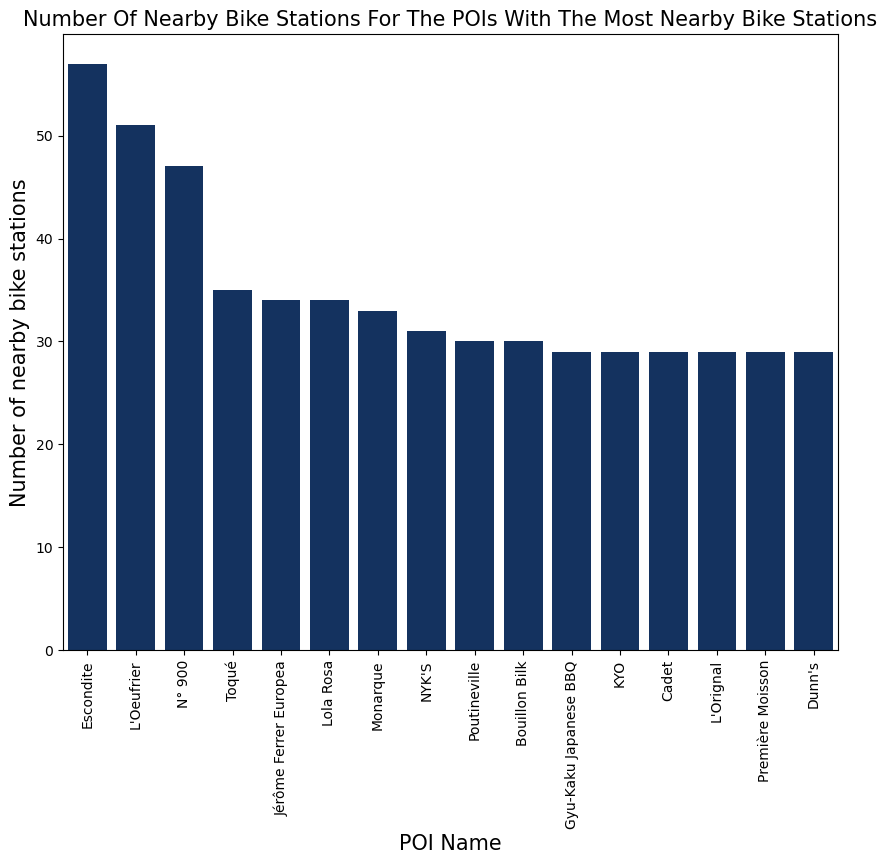

In [78]:
# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='POI Name', y='Number of nearby bike stations', data=top_16_counts_df, color = "#08306B")
plt.xticks(rotation=90)
plt.title('Number Of Nearby Bike Stations For The POIs With The Most Nearby Bike Stations' , fontsize=15)
plt.xlabel('POI Name', fontsize=15) 
plt.ylabel('Number of nearby bike stations', fontsize=15) 
plt.show()



C:\Users\Laven\AppData\Local\Temp\ipykernel_6852\23443141.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(counts_df['Number of nearby bike stations'], bins=bins, kde=False, palette=palette)
c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


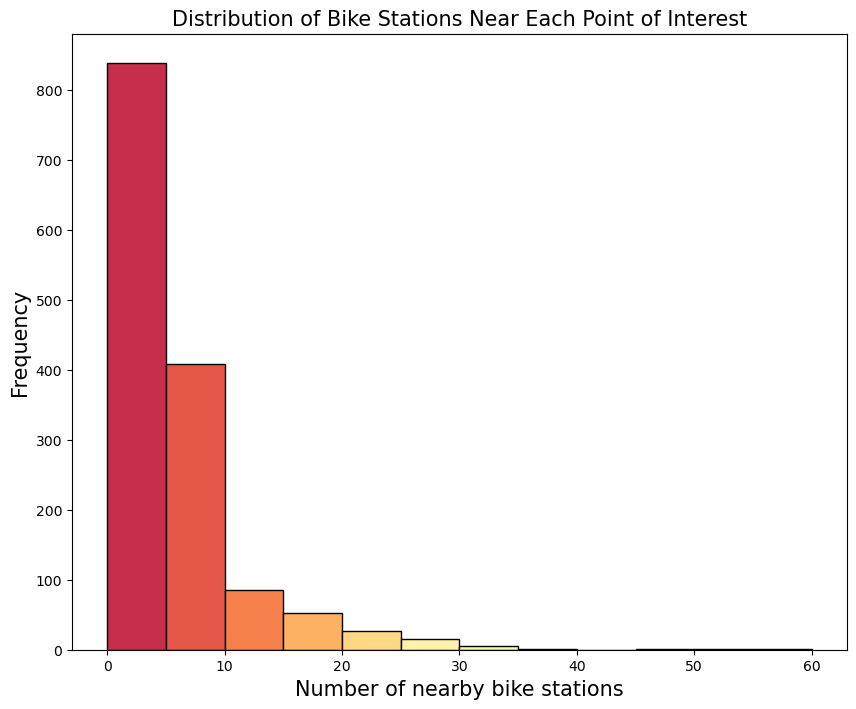

In [79]:
# Define the bin edges for the histogram
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Create a sequential color palette with Seaborn
# You can adjust the number of colors and the specific palette to match your chart as closely as possible
palette = sns.color_palette("Spectral", n_colors=12)

# Create the histogram with Seaborn
plt.figure(figsize=(10, 8))
sns.histplot(counts_df['Number of nearby bike stations'], bins=bins, kde=False, palette=palette)

# Assign a specific color to each bin using a loop
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(palette[i])

# Add labels and title
plt.xlabel('Number of nearby bike stations', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Bike Stations Near Each Point of Interest', fontsize=15)

# Show the plot
plt.show()

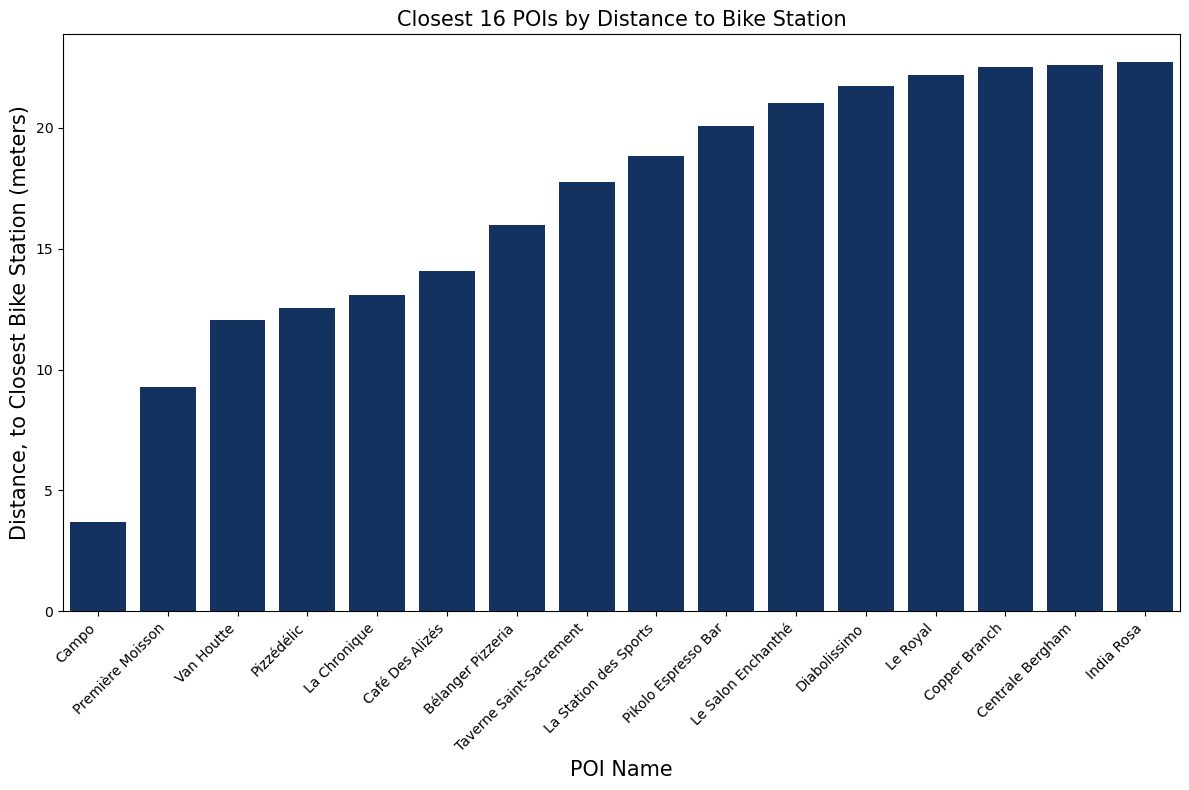

In [83]:
# Plot the bar graph
plt.figure(figsize=(12, 8))  # Increase the size as needed
sns.barplot(
    x='POI Name', 
    y='Distance_To_Closest_Bike_Station_Meters', 
    data=sorted_df.head(16),
    color = "#08306B"
)
plt.xticks(rotation=45, ha='right')  # Rotate the x labels to avoid overlap
plt.xlabel('POI Name', fontsize=15)
plt.ylabel('Distance, to Closest Bike Station (meters)', fontsize=15)
plt.title('Closest 16 POIs by Distance to Bike Station', fontsize=15)
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [223]:
import sqlite3
from sqlite3 import Error


In [224]:
# Connect to an SQLite database (if the file does not exist, it will be created)
conn = sqlite3.connect('montreal_yelp_citybikes_database.sqlite')


In [225]:
# Write the data to a sqlite table
joined_df_7.to_sql('points_of_interest', conn, if_exists='replace', index=False)
joined_df_closest_bike_station.to_sql('points_of_interest_closest_to_bike_station', conn, if_exists='replace', index=False)
counts_df.to_sql('counts', conn, if_exists='replace', index=False)


1437

In [217]:
# Define a cursor to use for database queries
cur = conn.cursor()

Look at the data before and after the join to validate your data.

In [218]:
# Assuming 'conn' is your SQLite connection object and the query has already been executed

# Execute a query and fetch the results into a DataFrame
validation_call = pd.read_sql_query("SELECT * FROM points_of_interest LIMIT 5", conn)


In [219]:
validation_call



,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name,Number of nearby bike stations
0,Escondite,0,Vegan,Sushi Bars,None,1206 Avenue Union,596.023482,246,4.2,2.0,45.502978,-73.567959,91.346744,45.502183,-73.568254,Robert-Bourassa / René-Lévesque,57
1,Escondite,0,Middle Eastern,Mediterranean,None,1224 Rue Drummond,573.789358,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57
2,Escondite,0,Asian Fusion,Bubble Tea,Taiwanese,1206 Avenue Union,321.918378,246,4.2,2.0,45.502978,-73.567959,91.346744,45.502183,-73.568254,Robert-Bourassa / René-Lévesque,57
3,Escondite,0,Barbeque,None,None,1224 Rue Drummond,1159.411344,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57
4,Escondite,0,Cocktail Bars,None,None,1224 Rue Drummond,1024.508463,57,4.3,2.0,45.497994,-73.573128,111.117869,45.498489,-73.574367,Ste-Catherine / Drummond,57


In [221]:
# Assuming 'conn' is your SQLite connection object and the query has already been executed

# Execute a query and fetch the results into a DataFrame
validation_call_2 = pd.read_sql_query("SELECT * FROM points_of_interest_closest_to_bike_station LIMIT 5", conn)


In [222]:
validation_call_2

,POI Name,is_closed,Category 1,Category 2,Category 3,address1,distance,review_count,rating,price,POI Latitude,POI Longitude,Distance_To_Closest_Bike_Station_Meters,Bike Station Latitude,Bike Station Longitude,Bike Station Name
0,3 Amigos,0,Middle Eastern,Moroccan,Mediterranean,1621 Rue Saint-Denis,122.934735,94,2.9,2.0,45.515029,-73.562918,109.513362,45.516014,-73.562920,BAnQ (Berri)
1,3 Patapoufs,0,Tea Rooms,None,None,3227 Rue Ontario E,1050.273046,3,4.7,NaN,45.541540,-73.547410,349.710747,45.544290,-73.545232,Aylwin / Ontario
2,30 Juin,0,Japanese,Sushi Bars,None,1694 Rue Sainte-Catherine E,243.048662,2,5.0,NaN,45.522190,-73.552360,183.981020,45.523845,-73.552366,Métro Papineau (Dorion / De Maisonneuve)
3,786 Halal Restaurant,0,Bakeries,None,None,850 Rue Jean-Talon O,249.350260,13,2.6,2.0,45.525784,-73.624759,249.350536,45.527941,-73.623886,Jean-Talon / de l'Épée
4,A Quinta,0,Portuguese,None,None,1851 Rue Ontario E,935.837123,21,4.0,2.0,45.526570,-73.559140,86.166482,45.526991,-73.558212,Dorion / Ontario
